<a href="https://colab.research.google.com/github/micheldc55/Deep-Learning/blob/main/PyTorch_linear_model_with_synthetic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pathlib

# Generating random synthetic data for a linear model

In [55]:
start = 0
end = 100
step = 0.5

weight = 0.5
bias = 0.5

torch.manual_seed(101)

X = torch.arange(start=start, end=end, step=step, dtype=torch.float).unsqueeze(dim=1)
y = weight * X + bias + 5 * torch.rand(len(X), 1)

In [56]:
X.shape, y.shape

(torch.Size([200, 1]), torch.Size([200, 1]))

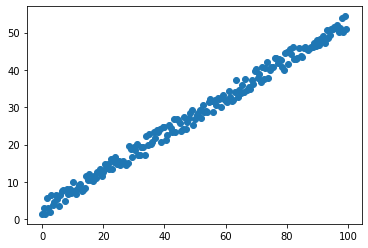

In [57]:
plt.scatter(X, y)

## Spliting data

In [58]:
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test   = X[train_split:], y[train_split:]

# Implement the model

In [76]:
device = 'cuda' if torch.cuda.is_available() else "cpu"

In [77]:
class LinearRegressionModel(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = torch.nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [92]:
torch.manual_seed(42)
model = LinearRegressionModel()

Testing the base model:

In [93]:
model.eval()

with torch.inference_mode():
  meaningless_preds = model(X_test)

In [94]:
def compare_preds_to_reality(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, preds=None):
  plt.figure(figsize=(10, 7))

  plt.scatter(X_train, y_train, c='b', s=7, label='Train data')
  plt.scatter(X_test, y_test, c='g', s=7, label='Test data')

  if preds is not None:
    plt.scatter(X_test, preds, c='r', s=7, label='Model Predictions')

  plt.legend()
  plt.title('Comparing model predictions to real data')
  plt.xlabel('X')
  plt.ylabel('y')

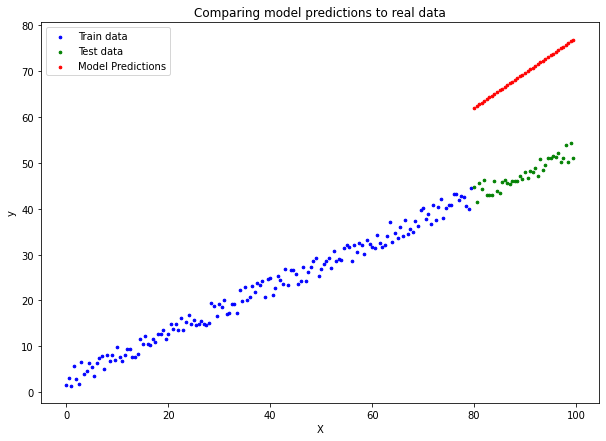

In [95]:
compare_preds_to_reality(preds=meaningless_preds)

# Define loss function and Optimizer

In [96]:
loss_fn = torch.nn.L1Loss()

optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

# Train model

In [97]:
epochs = 300
epoch_count = []
acc_train_loss = []
acc_test_loss  = []

model.to(device)

for epoch in range(1, epochs+1):
  model.train()

  X_train = X_train.to(device)
  X_test = X_test.to(device)
  y_train = y_train.to(device)
  y_test = y_test.to(device)

  # Forward pass:
  preds = model(X_train)

  # Calculate loss
  loss = loss_fn(preds, y_train)

  # Optimizer zero grad:
  optimizer.zero_grad()

  # Backprop calculations:
  loss.backward()

  # Optimizer step (tweaks model weights and biases)
  optimizer.step()

  if epoch % 10 == 0:
    model.eval()

    with torch.inference_mode():
      valid_preds = model(X_test)
      loss_valid = loss_fn(valid_preds, y_test)
      epoch_count.append(epoch)
      acc_train_loss.append(loss.item())
      acc_test_loss.append(loss_valid.item())

      print(f"Epoch: {epoch} | Training Loss: {loss.item()} | Test Loss: {loss_valid.item()}")

Epoch: 10 | Training Loss: 5.18796443939209 | Test Loss: 12.802409172058105
Epoch: 20 | Training Loss: 1.9646698236465454 | Test Loss: 4.0132155418396
Epoch: 30 | Training Loss: 1.893999695777893 | Test Loss: 1.189158320426941
Epoch: 40 | Training Loss: 1.5468547344207764 | Test Loss: 1.557787537574768
Epoch: 50 | Training Loss: 1.5603785514831543 | Test Loss: 2.9763121604919434
Epoch: 60 | Training Loss: 1.4885932207107544 | Test Loss: 1.9220914840698242
Epoch: 70 | Training Loss: 1.4833948612213135 | Test Loss: 1.5648524761199951
Epoch: 80 | Training Loss: 1.4637019634246826 | Test Loss: 1.8944370746612549
Epoch: 90 | Training Loss: 1.4517534971237183 | Test Loss: 1.861301064491272
Epoch: 100 | Training Loss: 1.438551664352417 | Test Loss: 1.647290587425232
Epoch: 110 | Training Loss: 1.4273414611816406 | Test Loss: 1.6792097091674805
Epoch: 120 | Training Loss: 1.4161139726638794 | Test Loss: 1.6320127248764038
Epoch: 130 | Training Loss: 1.4052481651306152 | Test Loss: 1.6029255390

In [98]:
model.eval()

with torch.inference_mode():
  valid_preds = model(X_test)

In [99]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([160, 1]),
 torch.Size([40, 1]),
 torch.Size([160, 1]),
 torch.Size([40, 1]))

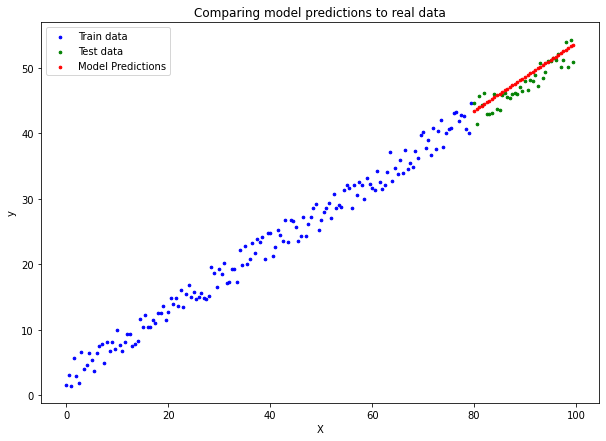

In [100]:
compare_preds_to_reality(X_train.squeeze(1), X_test.squeeze(1), y_train.squeeze(1), y_test.squeeze(1), valid_preds)